<a href="https://colab.research.google.com/github/E-Haroun/NaiveBayes_Algorithm_from_scratch/blob/main/iris_GaussNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#-1 **Handle** **Data**

In [15]:
import pandas as pd;
import numpy as np;
import random;
import math;
import matplotlib.pyplot as plt;

In [1]:
def loadcsv(file):
    dataset = pd.read_csv(file);
    dataset = dataset.values
    return dataset

#test loadcsv
#f="iris.csv"
#print(loadcsv(f)[:5])


In [2]:
#Now we need to split the data into training and testing dataset.

def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        np.random.seed(1)
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

#test splitDataset
#train,test = splitDataset(loadcsv(f),0.8)
#print("==> train",train)
#print("==> test",test)

## 2-     **Separate Data By Class**

In [3]:
#seperating as per the class

def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

# test separateByClass
#separated = separateByClass(loadcsv(f))
#Accessing seperated...
#print(separated['Iris-virginica'])
#print('Separated instances: {0}'.format(separated))


In [4]:
#Calculate the mean
def mean(arr):
    return sum(arr)/float(len(arr))

# test mean
#numbers = [1,2,3,4,5]
#print(numbers)
#print(mean(numbers))

In [5]:
# standard deviation
def stdev(arr):
    avg=mean(arr)
    variance=sum([pow(x-avg,2) for x in arr])/float(len(arr)-1)
    return math.sqrt(variance)

# test sdv
#numbers = [1,2,3.0,4.12,5]
#print(numbers)
#print(stdev(numbers))


In [6]:
#calculate mean and std classwise for each feature

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries


def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

#test summarizing
#dataset = [[1,20,1], [2,21,0], [3,22,1], [4,22,0]]
#summary = summarizeByClass(dataset)
#print('Summary by class value:',summary);


# 3- **Making Predictions**

In [7]:
#    Calculate Gaussian Probability Density Function

def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

#Calculate Class Probabilities
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

# test probability functions
#summaries = {0:[(33, 2)], 1:[(9, 4)]}
#inputVector = [9, '?']
#probabilities = calculateClassProbabilities(summaries, inputVector)
#print('Probabilities for each class:',probabilities)


In [9]:

#predicting the best label
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

#test label predicting
#summaries = {'A':[(1, 0.5)], 'B':[(20, 5.0)]}
#inputVector = [1, '?']
#result = predict(summaries, inputVector)
#print('Prediction:',result)


In [10]:
# Get the prediction as list
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

#test predict
#summaries = {'A':[(1, 0.5)], 'B':[(20, 5.0)]}
#testSet = [[1.1, '?'], [1.9, '?']]
#predictions = getPredictions(summaries, testSet)
#print('Predictions:',predictions)



In [11]:

def sel_color(l):
    if l[-1]==0:
        return 'red'
    if l[-1]==1:
        return 'blue'

def sel_color_2(l):
    if l[0]==0:
        return 'red'
    if l[0]==1:
        return 'blue'


In [12]:
#Accuracy
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        plt.scatter(testSet[x][1],testSet[x][2],marker='<', c=sel_color(testSet[x]))
        plt.scatter(testSet[x][1],testSet[x][2],marker='>', c=sel_color_2(predictions))
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

# test accuracy
#testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
#predictions = ['a', 'b', 'b']
#accuracy = getAccuracy(testSet, predictions)
#print('Accuracy:',accuracy)


In [13]:

# For Dataset that containe Str
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column])

 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

#to test
#for i in range(len(dataset[0])-1):
#      str_column_to_float(dataset, i)
# convert class column to integers
#str_column_to_int(loadcsv(f), len(loadcsv(f)[0])-1)

{2: [(6.597674418604651, 0.6281068956994894), (2.9651162790697674, 0.30541441083833903), (5.558139534883722, 0.5657832994806467), (2.0116279069767438, 0.2744772540888982)], 0: [(4.951428571428572, 0.38985021902945105), (3.385714285714286, 0.40230428719539935), (1.4257142857142857, 0.14621269185848476), (0.23714285714285716, 0.10025178386476334)], 1: [(5.909756097560976, 0.4689375641003718), (2.768292682926829, 0.30613642742268016), (4.239024390243903, 0.45982499322051207), (1.3219512195121952, 0.19813151581960814)]}
=======> Accuracy: 96.66666666666667%


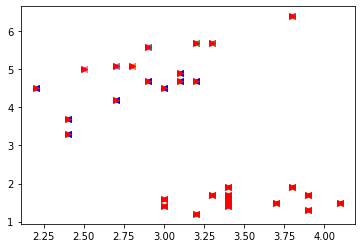

In [17]:
def main():
    filename="iris.csv"
    dataset=loadcsv(filename)
    for i in range(len(dataset[0])-1):
      str_column_to_float(dataset, i)
    # convert class column to integers
    str_column_to_int(dataset, len(dataset[0])-1)
    splitRatio = 0.8
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    #print("trinnnnnnnnnnnnnnnnnnnnnnnnnn",trainingSet)
    #print("testtttttttt",testSet)
    summaries = summarizeByClass(trainingSet)
    print(summaries)
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('=======> Accuracy: {0}%'.format(accuracy))
    plt.show()
    '''
    # define a new record
    row = [5.7,2.9,4.2,1.3]
    # predict the label
    label = predict(summaries, row)
    print('Data=%s, Predicted: %s' % (row, label))
    '''

main()